In [1]:
import matplotlib.pyplot as plt

from bandits import average_finder
from strategies import *

In [2]:
machine_no = 10
trial_no = 20000
gaussian = True
number_of_iterations = 50

In [3]:
random_strategy_regret = []
epsilon_first_strategy_regret = []
ucb_strategy_regret = []
thompson = []

In [4]:
for i in range(number_of_iterations):
    random_strategy_regret.append(
        random_strategy_calculator(machine_no, trial_no, gaussian).regret)
    epsilon_first_strategy_regret.append(
        epsilon_first_strategy(number_of_machines=machine_no,
                               number_of_trials=trial_no,
                               epsilon=0.06, gaussian=gaussian).regret)
    ucb_strategy_regret.append(
        ucb_strategy(machine_no, trial_no, confidence_level=1,
                     gaussian=gaussian).regret)
    thompson.append(
        (thompson_sampling_strategy(machine_no, trial_no,
                                    gaussian=gaussian)).regret)

In [5]:
random_average, rand_minus, rand_plus = average_finder(random_strategy_regret,
                                                       trial_no,
                                                       number_of_iterations)
epsilon_average, eps_minus, eps_plus = average_finder(
    epsilon_first_strategy_regret, trial_no, number_of_iterations)
ucb_average, ucb_minus, ucb_plus = average_finder(ucb_strategy_regret,
                                                  trial_no,
                                                  number_of_iterations)
thompson_average, thompson_minus, thompson_plus = average_finder(thompson,
                                                                 trial_no,
                                                                 number_of_iterations)

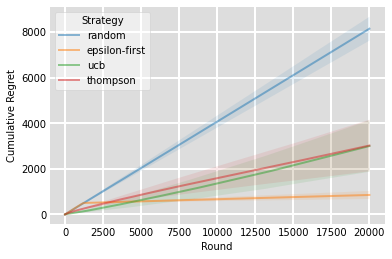

In [6]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(range(len(random_average)), random_average, alpha=0.5, lw=2,
        label='random')
ax.fill_between(range(len(random_average)), rand_minus, rand_plus, alpha=.1)
ax.plot(range(len(epsilon_average)), epsilon_average, alpha=0.5, lw=2,
        label='epsilon-first')
ax.fill_between(range(len(epsilon_average)), eps_minus, eps_plus, alpha=.1)
ax.plot(range(len(ucb_average)), ucb_average, alpha=0.5, lw=2,
        label='ucb')
ax.fill_between(range(len(ucb_average)), ucb_minus, ucb_plus, alpha=.1)
ax.plot(range(len(thompson_average)), thompson_average, alpha=0.5, lw=2,
        label='thompson')
ax.fill_between(range(len(thompson_average)), thompson_minus, thompson_plus,
                alpha=.1)
ax.set_xlabel('Round')
ax.set_ylabel('Cumulative Regret')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='both', c='w', lw=2, ls='-')
# plt.title("")
legend = ax.legend(title="Strategy")
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('plot10.png', dpi=1000, transparent=False, bbox_inches='tight')
plt.show()